# Importación de librerías: PyTorch ..

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import cv2
import torch
from tqdm import tqdm
from glob import glob
from PIL import Image
from torchvision import transforms
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# DataSet

Este conjunto de datos contiene imágenes de resonancia magnética cerebral junto con máscaras manuales de segmentación de anomalías FLAIR. Las imágenes se obtuvieron de The Cancer Imaging Archive (TCIA). Corresponden a 110 pacientes incluidos en la colección de gliomas de grado inferior del Atlas del Genoma del Cáncer (TCGA) con al menos una secuencia de recuperación de inversión atenuada por líquidos (FLAIR) y datos de conglomerados genómicos disponibles. Los grupos genómicos tumorales y los datos del paciente se proporcionan en el archivo.

Fuente: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation

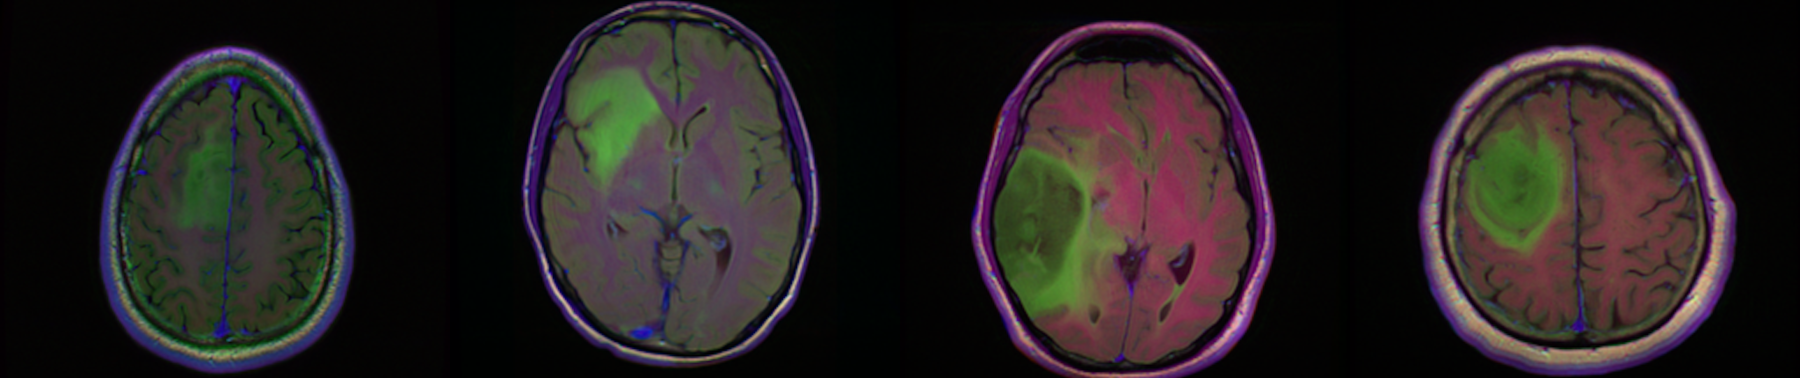

Carga de dataset

In [ ]:
# 📌 Parámetros de imagen
im_width = 256
im_height = 256

# 📂 Descargar y extraer datos desde Kaggle
!curl -L -o /content/lgg-mri-segmentation.zip https://www.kaggle.com/api/v1/datasets/download/mateuszbuda/lgg-mri-segmentation
!unzip -q /content/lgg-mri-segmentation.zip -d /content/lgg-mri-segmentation

# 📂 Cargar rutas de imágenes y máscaras
mask_files = glob('/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
train_files = [i.replace('_mask', '') for i in mask_files]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  713M  100  713M    0     0  38.5M      0  0:00:18  0:00:18 --:--:-- 40.1M
replace /content/lgg-mri-segmentation/kaggle_3m/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# 🔍 Muestra de imagenes cargadas : Imagenes originales y máscaras manuales

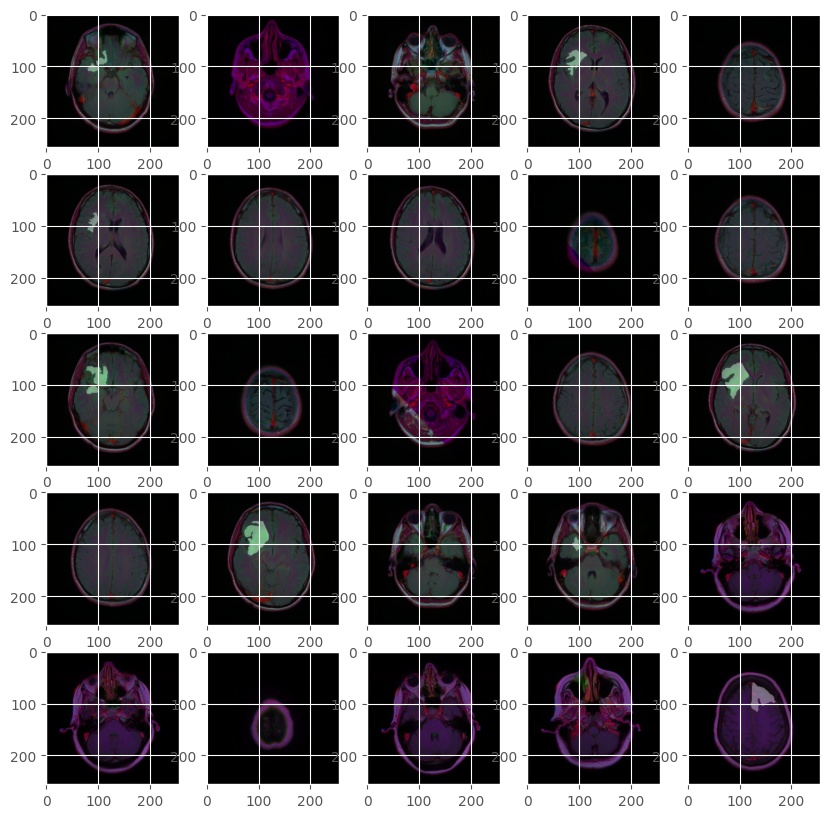

In [ ]:
rows,cols=5,5
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=train_files[i]
    msk_path=mask_files[i]
    img=cv2.imread(img_path)
    mask = cv2.imread(mask_files[i], cv2.IMREAD_GRAYSCALE)
    msk=cv2.imread(msk_path)
    plt.imshow(img)
    # Muestra la máscara sobre la imagen.
    # El argumento alpha=0.4 establece la transparencia de la máscara al 30%, lo que permite ver la imagen subyacente.
    plt.imshow(msk,alpha=0.3)
plt.show()

# Defining training, validation, and testing sets.

In [ ]:
# Dataframes
df = pd.DataFrame(data={"filename": train_files, 'mask' : mask_files})
# Especifica que el 10% de los datos se utilizará para el conjunto de prueba.
# El 90% restante se utilizará para el conjunto de entrenamiento.
df_train, df_test = train_test_split(df,test_size = 0.1)
# Especifica que el 20% del conjunto de entrenamiento actual se utilizará para el conjunto de validación.
# El 80% restante se convertirá en el nuevo conjunto de entrenamiento.
#df_train, df_val = train_test_split(df_train,test_size = 0.2)
print(df_train.values.shape)
#print(df_val.values.shape)
print(df_test.values.shape)

(3536, 2)
(393, 2)


# ⚡ Carga de modelo pre-entrenado : Arquitectura U-Net

In [ ]:
# PyTorch para cargar un modelo de segmentación cerebral UNet pre-entrenado
# UNet es una arquitectura popular para tareas de segmentación de imágenes, especialmente en el campo de la medicina.

# 3 canales de entrada : imágenes RGB
# 1 canal de salida, escalas de grises, donde valores podrían estar entre 0 y 1, donde 0 indica "no cerebro" y 1 indica "cerebro"
# hiperparámetro 32 filtros caracteríscas del modeno unet
# Flag preentrenado
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


# 🛫 Segmentación - visualización

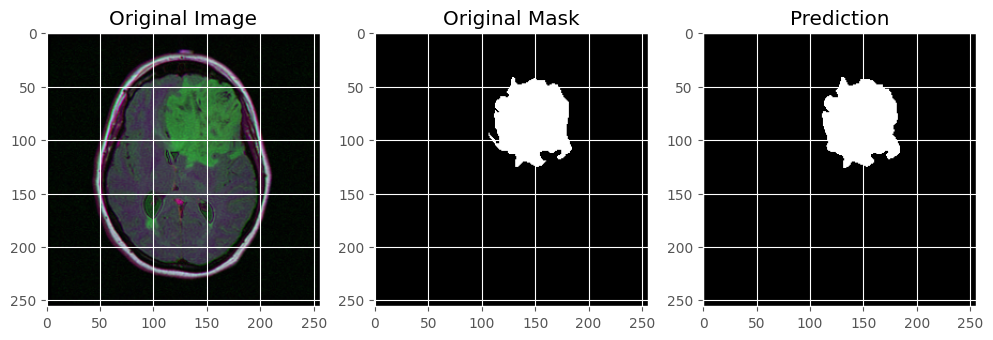

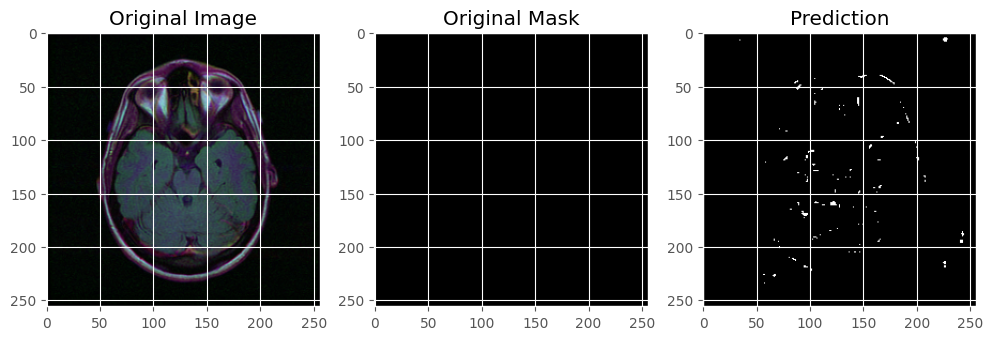

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


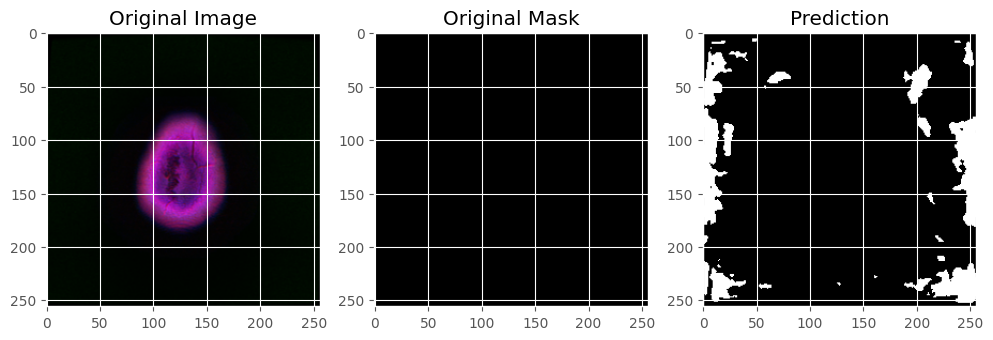

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


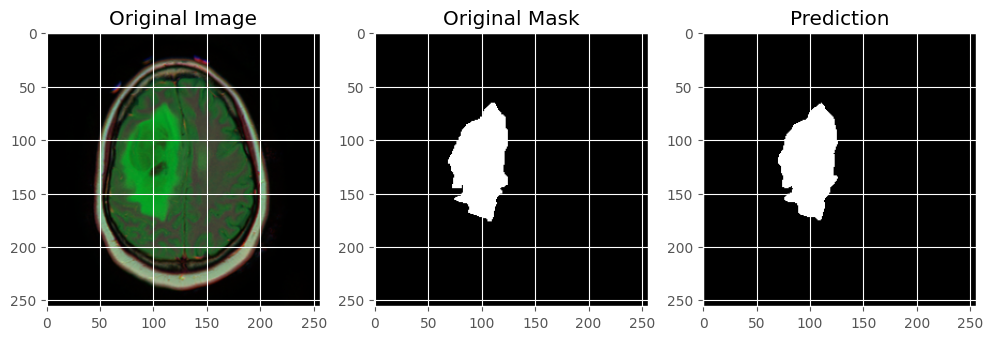

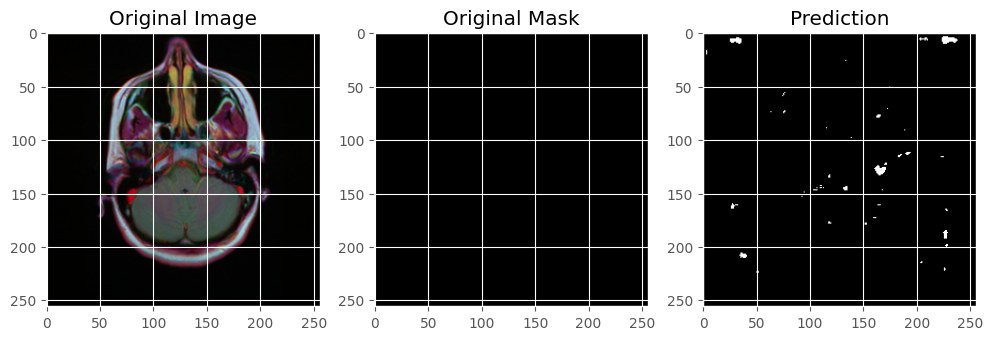

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


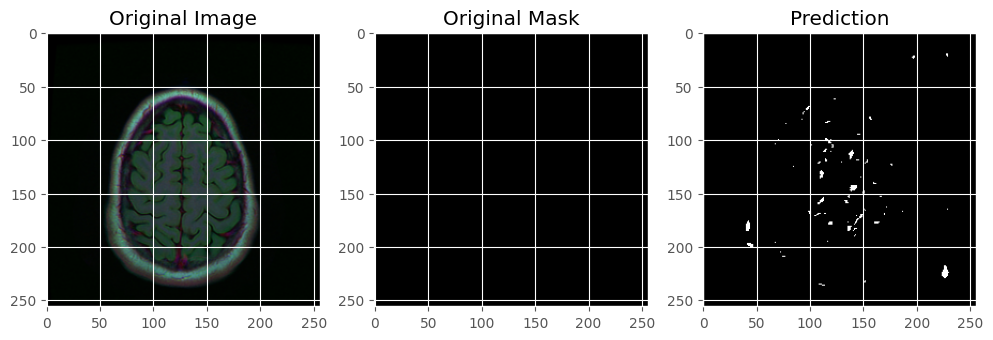

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


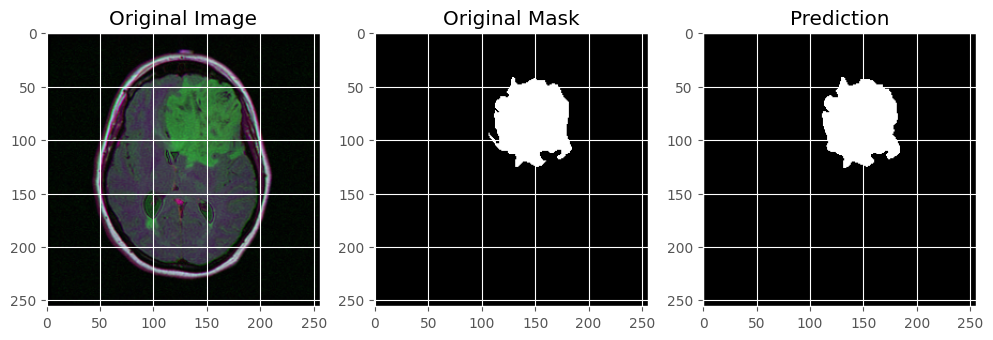

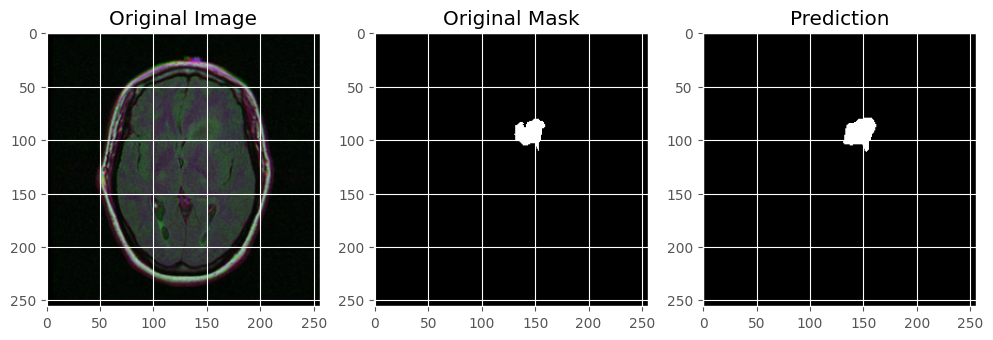

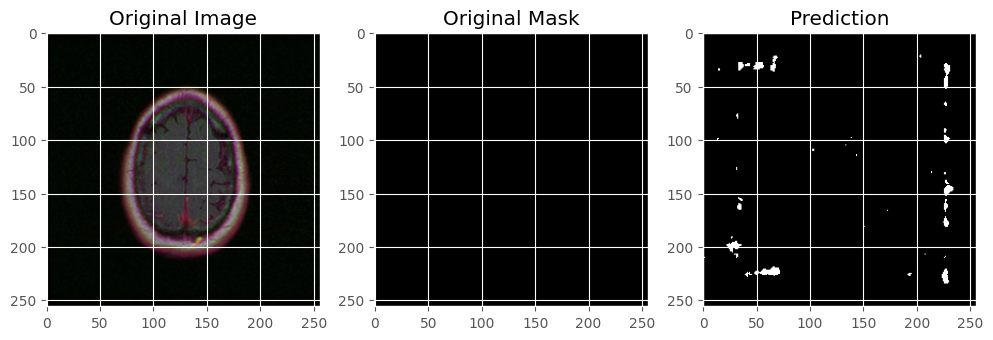

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


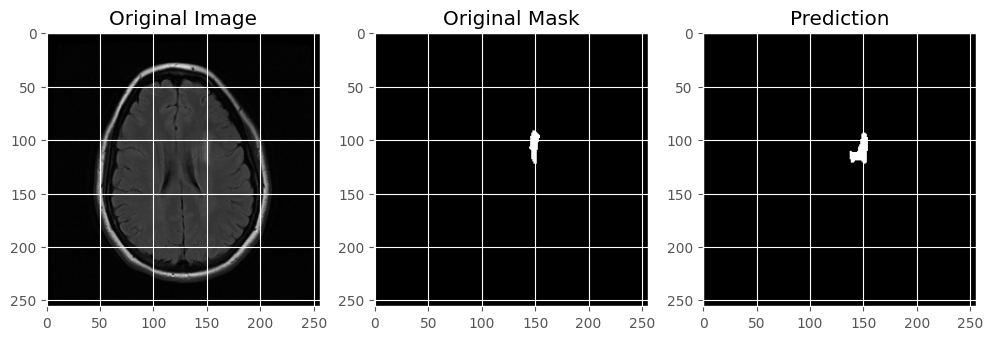

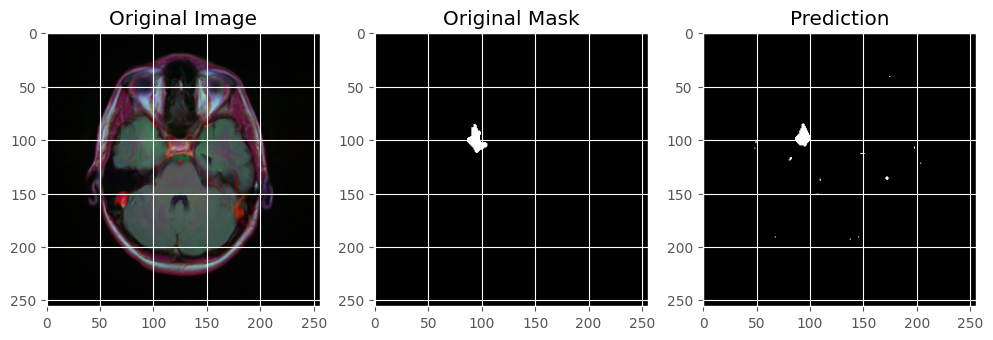

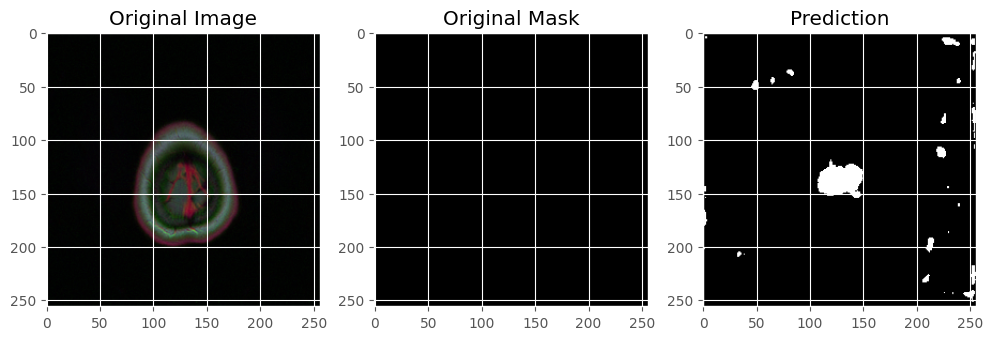

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


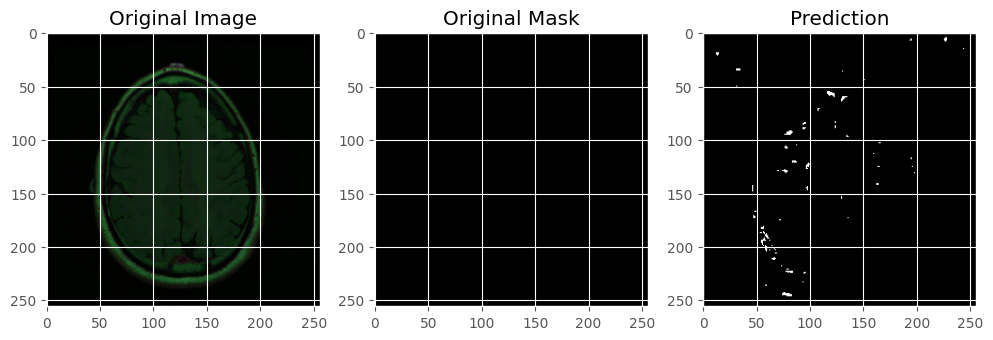

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


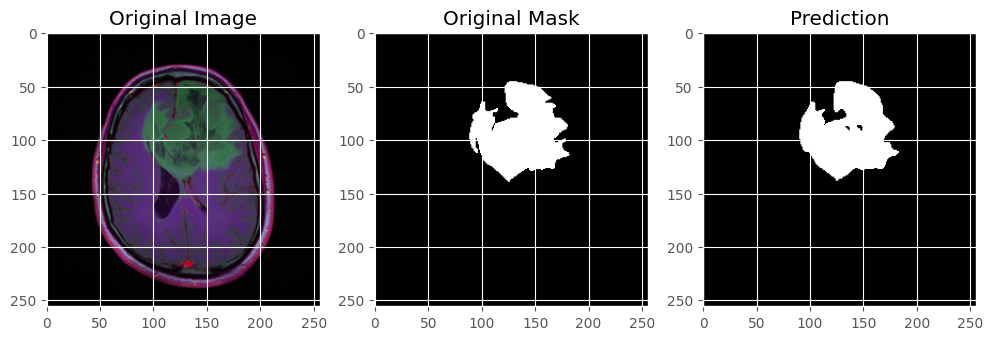

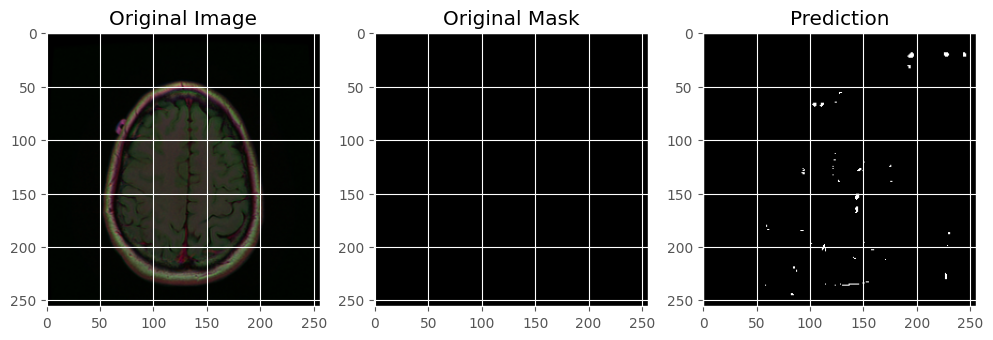

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


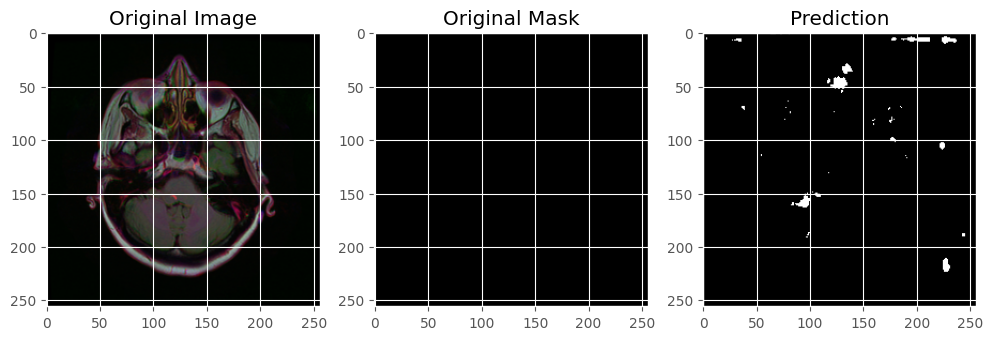

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


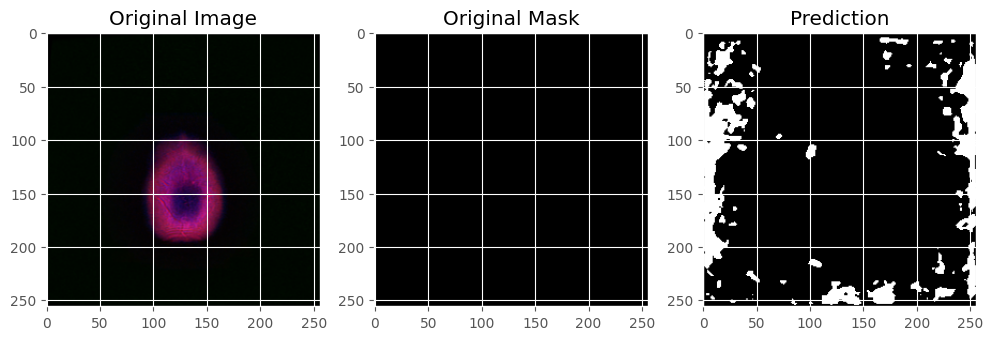

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


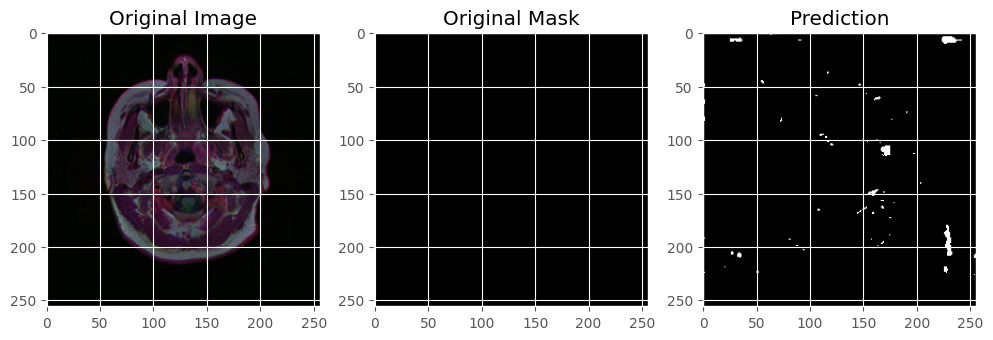

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


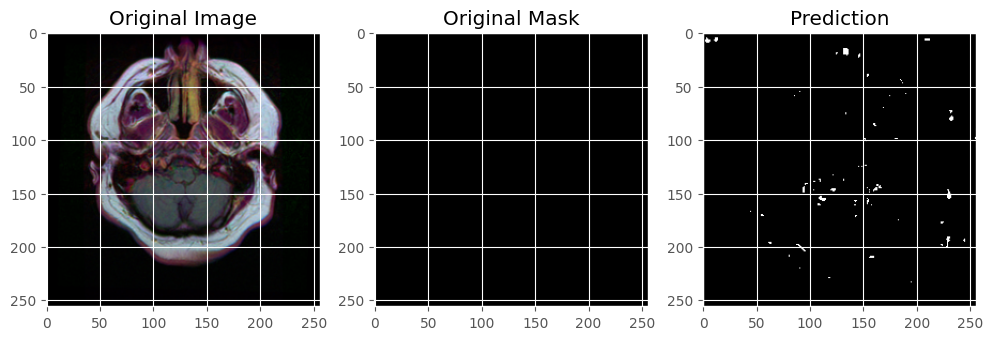

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


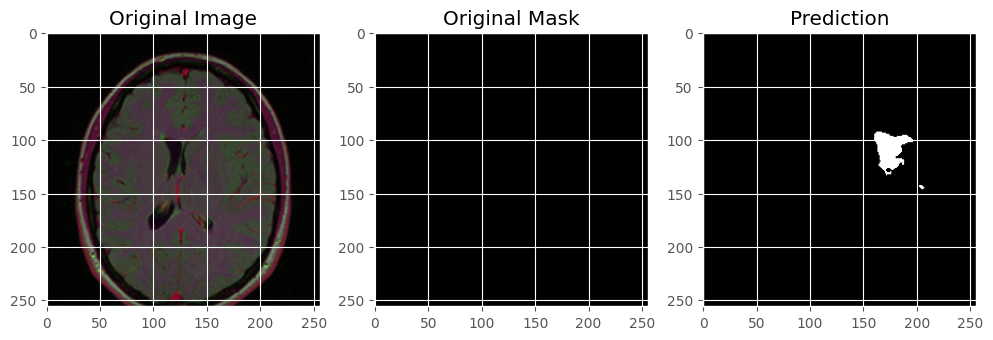

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


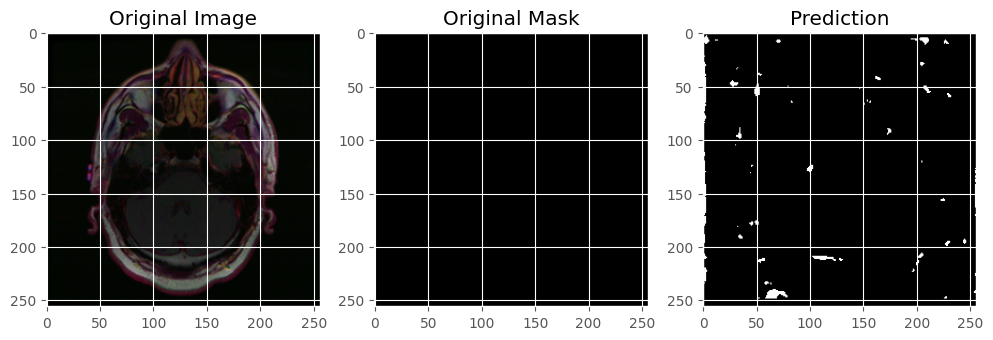

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


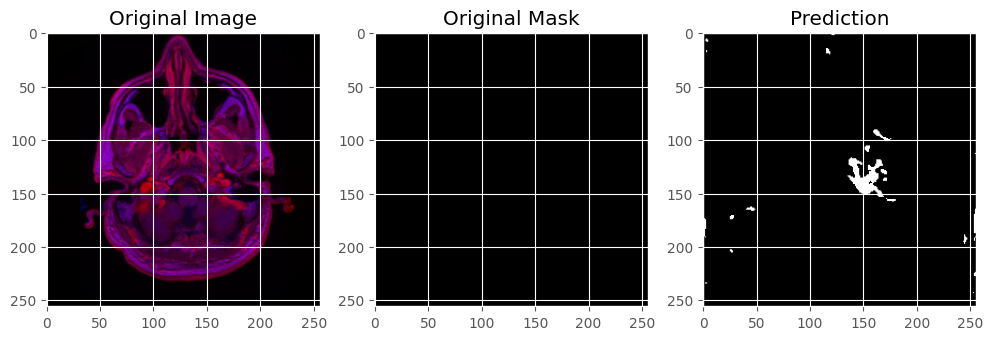

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


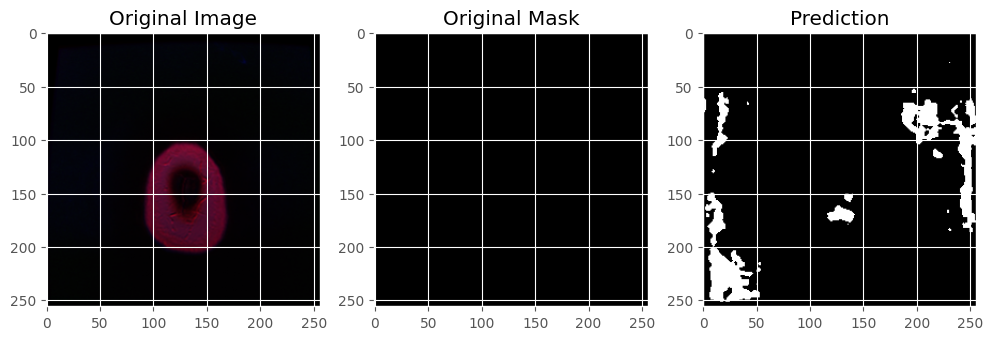

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


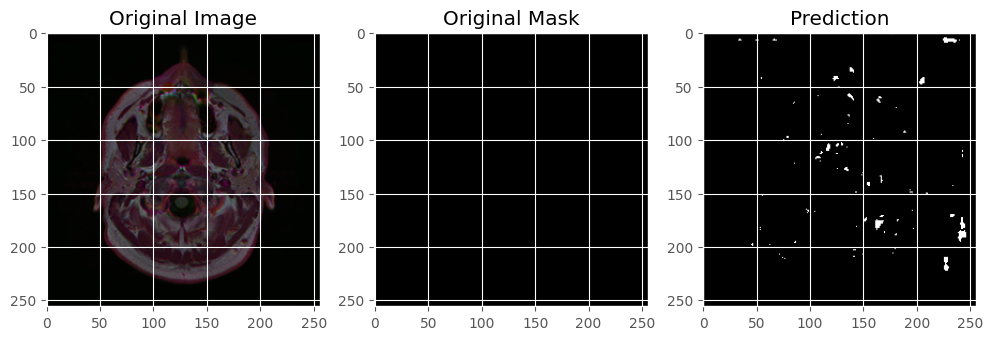

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


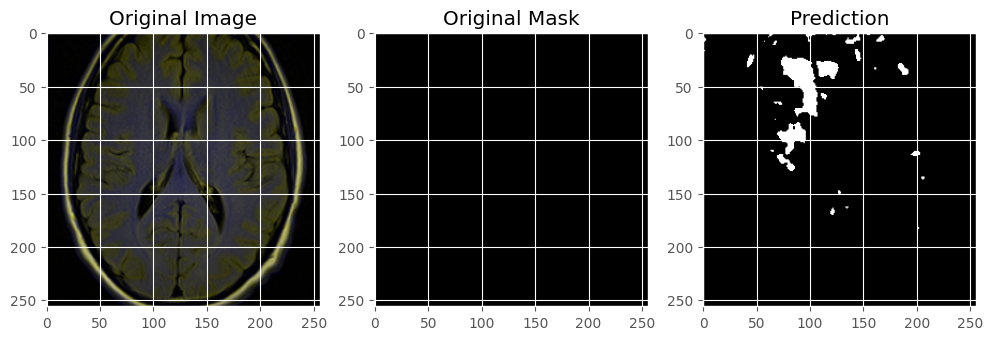

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


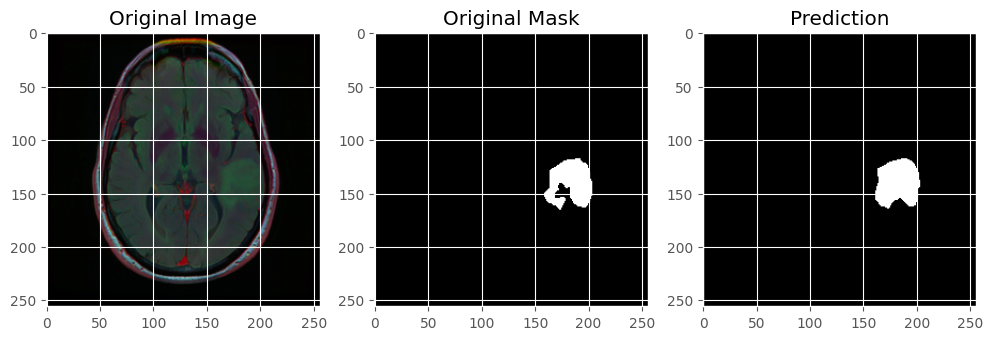

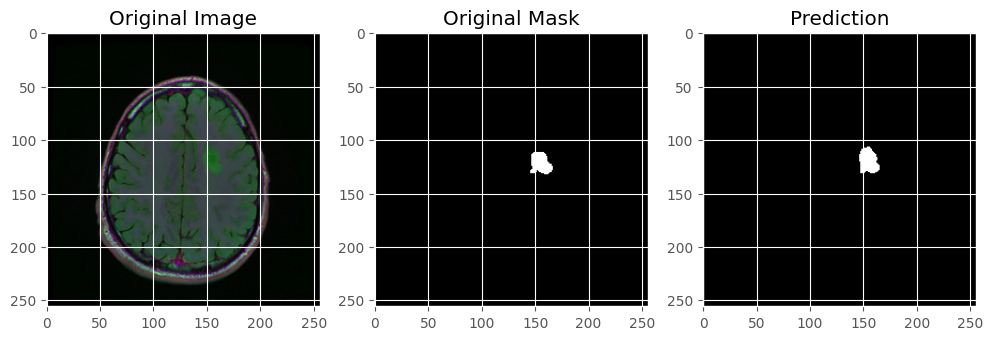

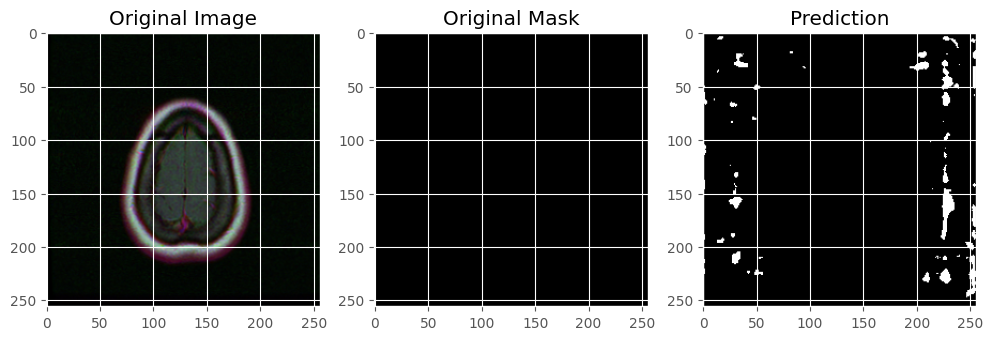

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


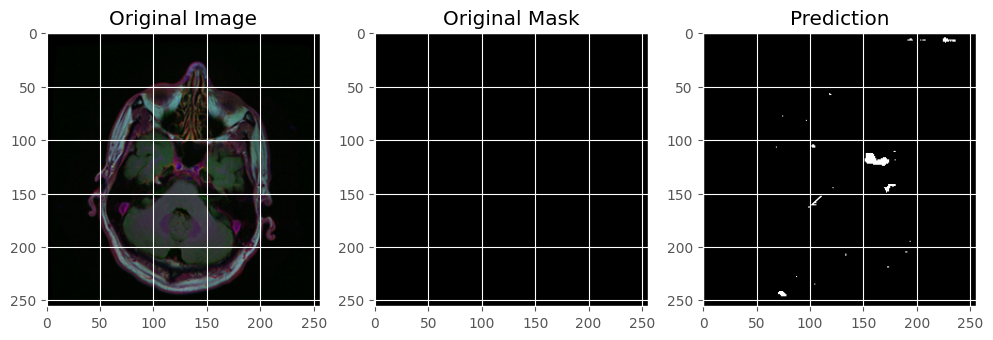

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


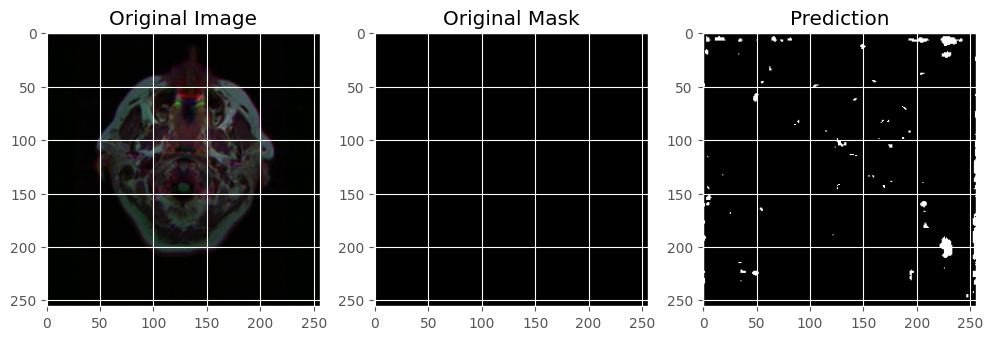

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

# Definir dimensiones de entrada (ajustar según entrenamiento)
im_height = 256
im_width = 256
precisiones = []
recalls = []
matrices_confusion = []

for i in range(30):
    index = np.random.randint(1, len(df_test.index))

    # Cargar imagen con OpenCV y normalizar
    img = cv2.imread(df_test['filename'].iloc[index])
    img = cv2.resize(img ,(im_height, im_width))
    img = img / 255
    # añade funcionalidad para pasar la imagen al modelo
    img = img[np.newaxis, :, :, :]

    # Cargar máscara
    mask = cv2.imread(df_test['mask'].iloc[index], cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (im_width, im_height))

    # Convertir imagen a tensor sin normalización adicional
    input_image = Image.open(df_test['filename'].iloc[index]).convert("RGB")
    #convierte la imagen PIL a un tensor de PyTorch.
    preprocess = transforms.Compose([
        transforms.ToTensor(),
    ])

    # Aplica la transformación y añade la dimensión de batch al tensor.
    input_tensor = preprocess(input_image).unsqueeze(0)

    # Mover a GPU si está disponible
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    input_tensor = input_tensor.to(device)
    model = model.to(device)

    # Predicción del modelo
    with torch.no_grad():
        # Ejecuta la predicción del modelo
        pred = model(input_tensor)

    # Mover la predicción a CPU antes de usar NumPy
    pred_np = pred.cpu().squeeze().numpy()

    # Visualizar resultados
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    #plt.imshow(img)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    # determina qué píxeles se consideran parte del objeto segmentado y cuáles no
    plt.imshow(pred_np > 0.8, cmap='gray')
    plt.title('Prediction')

    plt.show()

    # Calculando precisiones y recalls
    # Convertir las máscaras a arrays binarios (0 y 1)
    mask_bin = (mask > 0).astype(int)  # Asegúrate de que los valores de tu máscara sean 0 y 1
    pred_bin = (pred_np > 0.8).astype(int)  # Usar el mismo umbral que en la visualización

    # Aplanar las matrices para calcular las métricas
    mask_flat = mask_bin.flatten()
    pred_flat = pred_bin.flatten()

    # Calcular precisión y recall para la imagen actual
    precision = precision_score(mask_flat, pred_flat)
    recall = recall_score(mask_flat, pred_flat)

    precisiones.append(precision)
    recalls.append(recall)
    cm = confusion_matrix(mask_flat, pred_flat)
    matrices_confusion.append(cm)


# Calcular el promedio de precisión y recall

In [ ]:
# ¿De todas las veces que el modelo predijo que algo era positivo, cuántas veces realmente lo era?
precision_promedio = np.mean(precisiones)
#¿De todos los casos positivos reales, cuántos fueron correctamente identificados por el modelo?
recall_promedio = np.mean(recalls)
matriz_confusion_promedio = np.mean(matrices_confusion, axis=0)  # Promedio de las matrices

print(f"Precisión promedio: {precision_promedio}")
print(f"Recall promedio: {recall_promedio}")

Precisión promedio: 0.33307891820775615
Recall promedio: 0.3849751037604829


# Interpretación

**Precisión promedio: 0.35657264288104584**
Este valor indica que en promedio alrededor del 35.65% de las predicciones positivas realizadas por el modelo fueron realmente correctas.

**Recall promedio: 0.3679536882896015**
Este valor indica que en promedio el modelo fue capaz de identificar correctamente el 36.79% de todos los píxeles que realmente pertenecían a la clase positiva


# Visualizar la matriz de confusión promedio

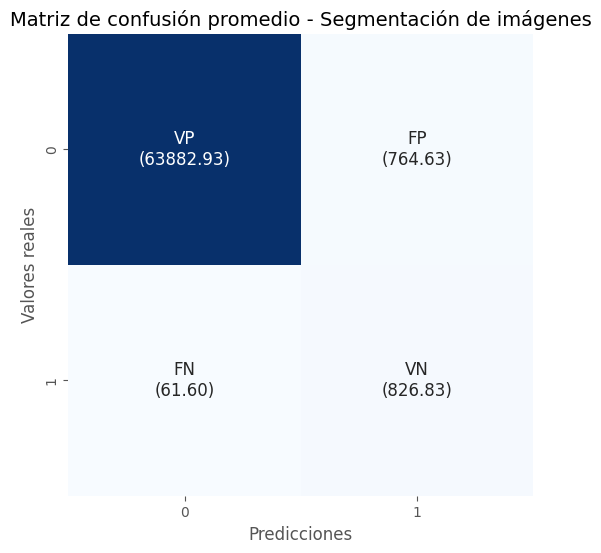

In [ ]:
# Etiquetas para las celdas de la matriz de confusión
labels = np.array([['VP', 'FP'], ['FN', 'VN']])

# Crear la figura y el mapa de calor
plt.figure(figsize=(6, 6))

# Combinar etiquetas y valores para las anotaciones
annotations = np.vectorize(lambda x, y: f"{x}\n({y:.2f})")(labels, matriz_confusion_promedio)

sns.heatmap(matriz_confusion_promedio, annot=annotations, fmt="", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 12},  # Ajustar tamaño de fuente si es necesario
            xticklabels=['0', '1'],  # Etiquetas para el eje x (predicciones)
            yticklabels=['0', '1'])  # Etiquetas para el eje y (valores reales)

plt.xlabel("Predicciones", fontsize=12)  # Aumentar tamaño de fuente si es necesario
plt.ylabel("Valores reales", fontsize=12)
plt.title("Matriz de confusión promedio - Segmentación de imágenes", fontsize=14)

plt.show()

# Interpretación


La matriz de confusión 2x2 , cerebro y no cerebro.


* Varios verdaderos Positivos: el valor alto en la celda de Verdaderos Positivos indica que el modelo es bueno para identificar correctamente los píxeles que pertenecen a la clase positiva.
*  Algunos falsos Positivos: el valor en la celda de Falsos Positivos sugiere que el modelo tiene algunos problemas para distinguir entre la clase positiva y la negativa, ya que predice incorrectamente algunos píxeles negativos como positivos.
* Bajos Falsos Negativos: El valor relativamente bajo en la celda de Falsos Negativos indica que tu modelo no está perdiendo muchos píxeles que realmente son positivos.
* Número Moderado de Verdaderos Negativos: El valor en la celda de Verdaderos Negativos muestra que el modelo también es capaz de identificar correctamente un número razonable de píxeles negativos.

